Importing data records from the file
Number of records imported: 210537

Data processing and obtaining results
-----------------------------------------------------------------------  ------
US Census Bureau, Department of Commerce                                 179148
National Oceanic and Atmospheric Administration, Department of Commerce  156351
U.S. Geological Survey, Department of the Interior                       110853
U.S. Department of Health & Human Services                                93514
Farm Service Agency, Department of Agriculture                            79039
National Agricultural Statistics Service, Department of Agriculture       76032
US Forest Service, Department of Agriculture                              74116
Foreign Agricultural Service, Department of Agriculture                   65760
Army Corps of Engineers, Department of the Army, Department of Defense    49214
Department of Defense                                                     46103
---------

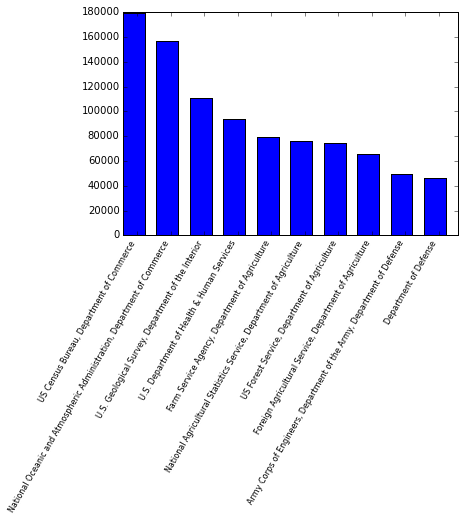

In [2]:
import csv
import operator
import os
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#pulling records from file and adding it to vector of vectors
array = []
i = 0
print("Importing data records from the file")
with open('datagovdatasetsviewmetrics.csv') as f:
    reader = csv.reader(f)
    for row in reader:
    	i = i + 1
    	array.append(row)

#printing out record pull results and announcing calculations
print("Number of records imported: {}\n".format(i-1))
print("Data processing and obtaining results")

#elimination of not needed sets of records to save memory and allow for grouping computation
del array[0]
for item in array:
	del item[4]
	del item[1]
	del item[0]
	item[1] = int(item[1])

#creation of grouping array
narr = []
for item in array:
	k = 0
	for i in range(0,len(narr)):
		if item[0] in narr[i][0]:
			narr[i][1] = narr[i][1] + item[1]
			k = 1
	if k == 0:
		narr.append(item)

#sorting function of grouping array in reverse order
narr = sorted(narr, key=operator.itemgetter(1), reverse=True)

#creation of array with 10 highest results
i = 0
tarr = []
x = []
y = []
for item in narr:
	if i < 10:
		tarr.append(item)
		x.append(item[0])
		y.append(item[1])
		i += 1

#creation of table based on array with highest results
print tabulate(tarr)


#graph based on array with highest results to be added
bar_width = 0.65
xl = np.arange(len(y))
fig, ax = plt.subplots()
ax.bar(xl, y, width=bar_width)
ax.set_xticks(xl + (bar_width/1.5))
ax.set_xticklabels(x, rotation=60, fontsize=8, horizontalalignment = 'right', verticalalignment = 'top')
plt.show()




		
		

